In [1]:
# Creating a function that returns polarity of a text using nltk VADER's sentiment analyzer
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

class SentimentAnalysis:
    
    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()
        
    def tb_polarity_calculator(self, text):
        blob = TextBlob(text)
        return blob.sentiment.polarity
        
    def tb_sentiment_prediction(self, text):
        blob = TextBlob(text)
        if(blob.sentiment.polarity<0):
            return -1
        elif(blob.sentiment.polarity==0):
            return 0
        else:
            return 1
        
    def polarity_calculator(self, text):
        polarity = self.analyzer.polarity_scores(text)
        return polarity
        
    def sentiment_prediction(self, text):
        polarity = self.analyzer.polarity_scores(text)
        if(polarity['compound']==0 and polarity['pos']==0 and polarity['neg']==0):
            return self.tb_sentiment_prediction(text)
        if polarity['compound']<0:
            return -1
        else:
            if polarity['compound']<0.2:
                if polarity['pos']-polarity['neg']<0.25:
                    return -1
        return 1

In [2]:
# Loading data set

import numpy as np
import pandas as pd

# data = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding='latin-1')
# DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
# data.columns = DATASET_COLUMNS

data = pd.read_csv('dataset2.csv', skiprows=[8835,535881] , usecols = ['Sentiment' , 'SentimentText'])
data.columns = ["target", "text"]

data.head()

,target,text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [3]:
# target values determine what the tweet is labeled as, 4: positive, 2: neutral, 0: negative

data["target"].value_counts()

1    790177
0    788435
Name: target, dtype: int64

In [4]:
# Generating a random shuffled subset out of the large data set

import random
random_data = []
size = 20000
for i in range(size):
    index = int(random.random() * 1500000)
    random_data.append([data["target"][index], data["text"][index]])
data_set = pd.DataFrame(random_data)
data_set.columns = ["target", "text"]

data_set2 = pd.DataFrame(random_data)
data_set2.columns = ["target", "text"]

data_set.head(10)

,target,text
0,1,"@Pishy__x yes, ugh I love anime!!!! Haha yer I..."
1,1,Recommended @panacea81 to @MrTweet 'A really n...
2,1,"@IanCovey Heh, it is something I am working on..."
3,0,...cant drive away from my k and 2 graders fir...
4,1,is off to JoAnn Fabrics
5,1,Maybe I'll get back to coding over the next we...
6,0,is still searching for a job
7,1,"Just saw Into the Wild - what a great movie, a..."
8,0,@lisa_g ahhh lucky you... I don't for the next...
9,0,"@sfannah @mattgarner I am just joking lol, I a..."


In [5]:
data_set['target'].value_counts()

1    10099
0     9901
Name: target, dtype: int64

In [6]:
# Applying label column for the values

data_set['label'] = data_set['target'].apply(lambda x: -1 if x == 0 else 1)
data_set.head(10)

,target,text,label
0,1,"@Pishy__x yes, ugh I love anime!!!! Haha yer I...",1
1,1,Recommended @panacea81 to @MrTweet 'A really n...,1
2,1,"@IanCovey Heh, it is something I am working on...",1
3,0,...cant drive away from my k and 2 graders fir...,-1
4,1,is off to JoAnn Fabrics,1
5,1,Maybe I'll get back to coding over the next we...,1
6,0,is still searching for a job,-1
7,1,"Just saw Into the Wild - what a great movie, a...",1
8,0,@lisa_g ahhh lucky you... I don't for the next...,-1
9,0,"@sfannah @mattgarner I am just joking lol, I a...",-1


In [7]:
# Generating polarity scores column

sentiment_analyzer = SentimentAnalysis()
data_set['prediction'] =  data_set['text'].apply(lambda x: sentiment_analyzer.sentiment_prediction(x))
data_set.head(10)

,target,text,label,prediction
0,1,"@Pishy__x yes, ugh I love anime!!!! Haha yer I...",1,1
1,1,Recommended @panacea81 to @MrTweet 'A really n...,1,1
2,1,"@IanCovey Heh, it is something I am working on...",1,-1
3,0,...cant drive away from my k and 2 graders fir...,-1,1
4,1,is off to JoAnn Fabrics,1,0
5,1,Maybe I'll get back to coding over the next we...,1,0
6,0,is still searching for a job,-1,0
7,1,"Just saw Into the Wild - what a great movie, a...",1,1
8,0,@lisa_g ahhh lucky you... I don't for the next...,-1,1
9,0,"@sfannah @mattgarner I am just joking lol, I a...",-1,1


In [8]:
# Creating accuracy column
data_set['accuracy'] = data_set.apply(lambda x: 1 if (x['prediction'] == x['label'] or x['prediction']==0) else 0, axis=1)
data_set.head(10)

,target,text,label,prediction,accuracy
0,1,"@Pishy__x yes, ugh I love anime!!!! Haha yer I...",1,1,1
1,1,Recommended @panacea81 to @MrTweet 'A really n...,1,1,1
2,1,"@IanCovey Heh, it is something I am working on...",1,-1,0
3,0,...cant drive away from my k and 2 graders fir...,-1,1,0
4,1,is off to JoAnn Fabrics,1,0,1
5,1,Maybe I'll get back to coding over the next we...,1,0,1
6,0,is still searching for a job,-1,0,1
7,1,"Just saw Into the Wild - what a great movie, a...",1,1,1
8,0,@lisa_g ahhh lucky you... I don't for the next...,-1,1,0
9,0,"@sfannah @mattgarner I am just joking lol, I a...",-1,1,0


In [9]:
# Creating a confusion matrix column

def conf_matrix(x):
  if x['label'] == -1 and x['prediction'] == -1:
    return 'TP'
  elif x['label'] == -1 and x['prediction'] == 1:
    return 'FN'
  elif x['label'] == 1 and x['prediction'] == -1:
    return 'FP'
  elif x['label'] == 1 and x['prediction'] == 1:
    return 'TN'
  else:
    return 0
    
data_set['Conf_Matrix'] = data_set.apply(lambda x: conf_matrix(x), axis=1)
data_set.head(10)

,target,text,label,prediction,accuracy,Conf_Matrix
0,1,"@Pishy__x yes, ugh I love anime!!!! Haha yer I...",1,1,1,TN
1,1,Recommended @panacea81 to @MrTweet 'A really n...,1,1,1,TN
2,1,"@IanCovey Heh, it is something I am working on...",1,-1,0,FP
3,0,...cant drive away from my k and 2 graders fir...,-1,1,0,FN
4,1,is off to JoAnn Fabrics,1,0,1,0
5,1,Maybe I'll get back to coding over the next we...,1,0,1,0
6,0,is still searching for a job,-1,0,1,0
7,1,"Just saw Into the Wild - what a great movie, a...",1,1,1,TN
8,0,@lisa_g ahhh lucky you... I don't for the next...,-1,1,0,FN
9,0,"@sfannah @mattgarner I am just joking lol, I a...",-1,1,0,FN


In [10]:
# Printing confusion matrix value counts

conf_vals = data_set.Conf_Matrix.value_counts().to_dict()
print(conf_vals)

{'TN': 6497, 'TP': 4951, 0: 3828, 'FN': 3171, 'FP': 1553}


In [11]:
accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score = 2*precision*recall / (precision + recall)
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision, 2),'%',
      '\nRecall: ', round(100 * recall, 2),'%',
      '\nF1 Score: ', round(100 * f1_score, 2),'%')

Accuracy:  70.79 % 
Precision:  76.12 % 
Recall:  60.96 % 
F1 Score:  67.7 %


In [12]:
import os
from dotenv import load_dotenv

load_dotenv()
    
# Assigning values of authorization keys from environment variables
consumer_key = os.environ.get("TWTAPI_CK")
consumer_secret = os.environ.get("TWTAPI_CS")
access_token = os.environ.get("TWTAPI_AT")
access_token_secret = os.environ.get("TWTAPI_ATS")

In [13]:
from tweepy import OAuthHandler, API, Cursor

# Authorizing Twitter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth)

In [14]:
# A function to fetch a given user's details from Twitter API

def fetch_user_details(auth_api, user):
    user_item = auth_api.get_user(user)
    # Adding user details into a list.
    user_details = [
        user_item.name,
        user_item.screen_name,
        user_item.description,
        user_item.statuses_count,
        user_item.friends_count,
        user_item.followers_count,
    ]
    return user_details

In [15]:
# Function to check if a tweet is in english language

from langdetect import detect

def is_english(Text):
    try:
        if(detect(Text) == "en"):
            return True;
        else:
            return False;
    except:
        return False

In [16]:
# A function to fetch a user's tweets from Twitter API

def fetch_user_tweets(auth_api, user, max_count):
    # A list to store all the tweets by the user
    user_tweets = []
    # Fetching tweets of the given user from Twitter API and travesing through them.
    for status in Cursor(auth_api.user_timeline, id=user, tweet_mode="extended").items(max_count):
        if(status.retweeted==True or ('RT @' in status.full_text) ):
            # Condition to check if the tweet is not original
            continue
        if(not is_english(status.full_text)):
            continue
        if(len(status.full_text)<=25):
            continue
        # Appending all the necessary details related to the tweet into the user tweets list.
        user_tweets.append(status.full_text)
    return user_tweets

In [17]:
# A function to process users

def process_users(auth_api, user):
    # Calling functions to fetch the user's details and tweets.
    user_details = fetch_user_details(auth_api, user)
    user_tweets = fetch_user_tweets(auth_api, user, 1000)
        
    tweet_data = pd.DataFrame(user_tweets)
    tweet_data['prediction'] =  tweet_data[0].apply(lambda x: sentiment_analyzer.sentiment_prediction(x))
    tweet_data['polarity'] = tweet_data[0].apply(lambda x: sentiment_analyzer.polarity_calculator(x))
    
    return tweet_data

In [18]:
import matplotlib.pyplot as plt

def plot_graph(data, title, xlabel, ylabel):
    polarity = list(data.keys())
    count = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    barlist = plt.bar(polarity, count,
            width = 0.3)
    barlist[0].set_color('g')
    barlist[1].set_color('r')
    if(title=="Average polarity"):
        barlist[2].set_color('orange')
        plt.ylim(0, 1)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
def donut_chart(data):
    names = list(data.keys())
    size = list(data.values())

    # Create a circle at the center of the plot
    my_circle = plt.Circle( (0,0), 0.7, color='white')

    # Give color names
    plt.pie(size, labels=names, colors=['green','red', 'blue'])
    p = plt.gcf()
    p.gca().add_artist(my_circle)

    # Show the graph
    plt.show()


def display_result(result):
    
    result_predictions = result.prediction.value_counts().to_dict()
    for i in range(-1, 2):
        if i not in result_predictions:
            result_predictions[i]=0
            
    total_tweets = len(result.index)
    
    average_polarity = {"pos":0, "neg":0, "compound":0}
    for i in result["polarity"]:
        for j in average_polarity:
            average_polarity[j] += i[j]
    for i in average_polarity:
        average_polarity[i] = round(average_polarity[i]/total_tweets, 5)
    
    data = dict()
    data["Positive"] = round((result_predictions[1]/total_tweets)*100, 2)
    data["Negative"] = round((result_predictions[-1]/total_tweets)*100, 2)
    data["Neutral"] = round((result_predictions[0]/total_tweets)*100, 2)
    
    print("Total valid tweets:", total_tweets,)
    
    new_keys = ['Negative tweets','Neutral tweets', 'Positive tweets']
    for key in range(-1, 2):
        result_predictions[new_keys[key+1]] = result_predictions.pop(key)
    print(result_predictions)
    
    plot_graph(data, "Tweet polarity by percentage", "Polarity", "Percentage of tweets")
    donut_chart(data)
    
    print("Average polarity score given by algorithm:", average_polarity)
    new_keys = ['Average positivity score','Average negativity score','Average polarity score']
    for key,n_key in zip(average_polarity.keys(), new_keys):
        average_polarity[n_key] = average_polarity.pop(key)
    plot_graph(average_polarity, "Average polarity", "Title", "Score")
    
    

In [19]:
result1 = process_users(auth_api, "paradox_pj")
result1.head()

,0,prediction,polarity
0,@sickbuttowski People who blame are nothing bu...,1,"{'neg': 0.086, 'neu': 0.609, 'pos': 0.305, 'co..."
1,@akkkashh why are you ditching football plans ...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@sickbuttowski Donnarumma the fucking god,1,"{'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'comp..."
3,mf i have started calling cursor pointer as cr...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"you can't scream loud enough, no no",-1,"{'neg': 0.413, 'neu': 0.375, 'pos': 0.212, 'co..."


Total valid tweets: 463
{'Negative tweets': 171, 'Neutral tweets': 125, 'Positive tweets': 167}


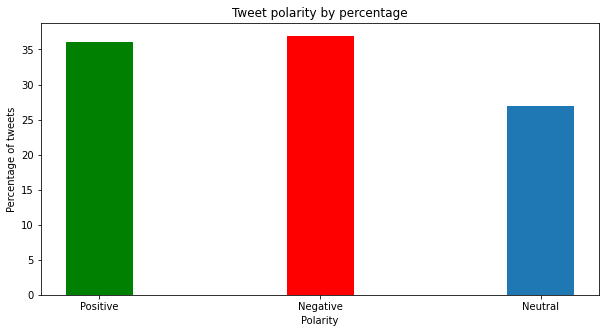

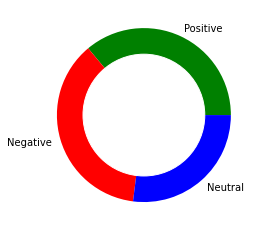

Average polarity score given by algorithm: {'pos': 0.10868, 'neg': 0.08751, 'compound': 0.02945}


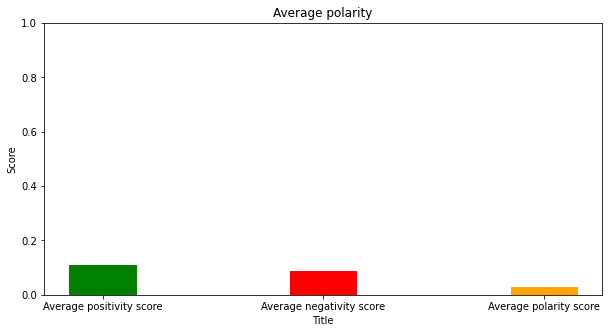

In [20]:
# Displaying result1
display_result(result1)

In [21]:
result2 = process_users(auth_api, "anubhavitis")
result2.head()

,0,prediction,polarity
0,@Rishika5000 @Adobe I admire the fact they gav...,1,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp..."
1,@ArunimaKhunteta Why on earth did you open Win...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"@saurabh_katkade @__akash__19 Have patience, a...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Glad to see someone is talking about these stu...,1,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp..."
4,@__akash__19 Lot of people don't tend to under...,1,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp..."


Total valid tweets: 630
{'Negative tweets': 119, 'Neutral tweets': 164, 'Positive tweets': 347}


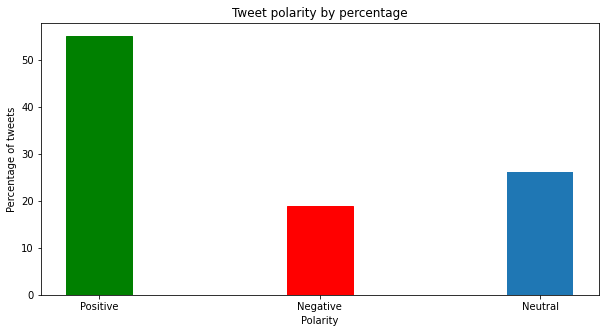

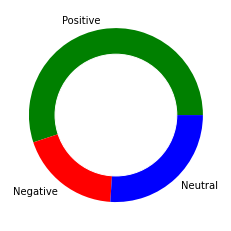

Average polarity score given by algorithm: {'pos': 0.1943, 'neg': 0.04982, 'compound': 0.19992}


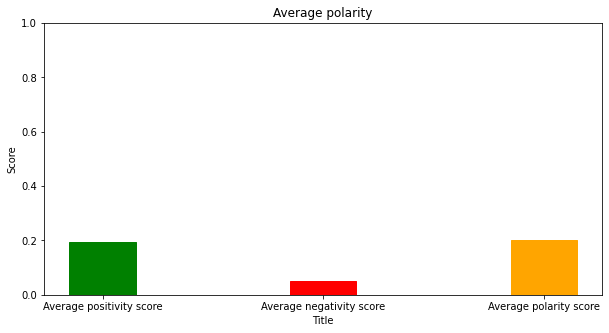

In [22]:
# Display result2
display_result(result2)

In [23]:
result3 = process_users(auth_api, "pragati_verma18")
result3.head()

,0,prediction,polarity
0,@Roh057 @letsananyafy Well if you genuinely th...,1,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp..."
1,@Roh057 And only a good artist can see through...,1,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
2,@tanishaaa03 That's weird how easily Monday vi...,1,"{'neg': 0.106, 'neu': 0.625, 'pos': 0.269, 'co..."
3,@pragdua Thanks Pragun 😃\nYou're doing a great...,1,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp..."
4,@pragdua 👋 \nThat would be awesome. Thank you ...,1,"{'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'comp..."


Total valid tweets: 719
{'Negative tweets': 102, 'Neutral tweets': 143, 'Positive tweets': 474}


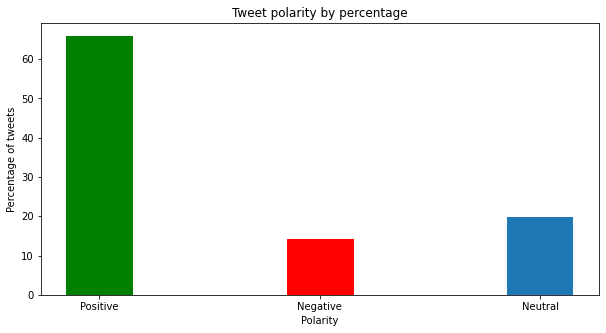

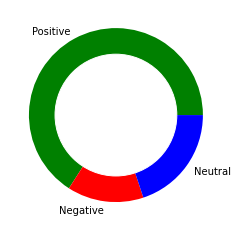

Average polarity score given by algorithm: {'pos': 0.19776, 'neg': 0.03271, 'compound': 0.36504}


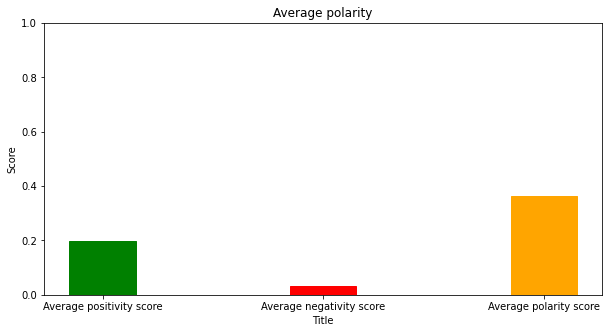

In [24]:
# Display result3
display_result(result3)

In [25]:
result4 = process_users(auth_api, "swahadesi")
result4.head()

TweepError: [{'code': 50, 'message': 'User not found.'}]

In [ ]:
display_result(result4)